# Lab 4: Random numbers, splitting data, evaluating model performance

- **Author:** Niall Keleher ([nkeleher@uw.edu](mailto:nkeleher@uw.edu))
- **Date:** January 2017
- **Course:** INFX 574: Data Science II: Machine Learning & Econometrics

### Learning Objectives:
By the end of the lab, you will be able to:
* create dummy variables for use in regressions
* generate random numbers for use in randomization and train-test splits
* identify measures for evaluating regression performance

### Topics:
1. Qualitative/Categorical predictors
2. Generating random numbers 
3. Splitting data into training and test sets
4. Running regressions & generating predictions
5. Model performance

### References: 
* [Pandas - get_dummies()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
* [random library](https://docs.python.org/2/library/random.html)
* [Sci-kit Learn Cross Validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)
* [Introduction to Statistical Learning, Lab #5](http://www-bcf.usc.edu/~gareth/ISL/Chapter%205%20Lab.txt)

In [52]:
import numpy as np
import pandas as pd

In [53]:
auto_df = pd.read_csv('data/Auto.csv')

In [54]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 1. Qualitative/Categorical predictors -  Generate dummy variables in python

In [55]:
auto_df.cylinders.value_counts()

4    203
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [56]:
pd.get_dummies(auto_df.cylinders).head()

,3,4,5,6,8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [7]:
cyl_dummies = pd.get_dummies(auto_df.cylinders, prefix='cyl')

In [8]:
auto_df2 = pd.concat([auto_df, cyl_dummies], axis=1)

In [9]:
auto_df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0,0,0,1


### 2. Generating random numbers - randomizing treatment assignment

In [10]:
import random

In [11]:
random.random()  # Random float x, 0.0 <= x < 1.0

0.6948043910645632

In [12]:
random.uniform(1,100)  # Random float x, 0.0 <= x < 100.0

4.541091331693065

In [13]:
random.randint(1, 10)  # Integer from 1 to 10, endpoints included

4

In [14]:
random.sample([1, 2, 3, 4, 5],  3)

[2, 4, 5]

In [15]:
random.seed(47653)

In [16]:
raw_data = {'first_name': ['Niall', 'Josh', 'Li', 'Lavi', 'Jevin', 'Emma'],  
        'sex': ['male', 'male', 'female', 'male', 'male', 'female']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'sex'])

In [17]:
df

,first_name,sex
0,Niall,male
1,Josh,male
2,Li,female
3,Lavi,male
4,Jevin,male
5,Emma,female


In [18]:
df['rand'] = df.apply(lambda row: random.random(), axis=1)

In [19]:
df

,first_name,sex,rand
0,Niall,male,0.009981
1,Josh,male,0.897681
2,Li,female,0.804464
3,Lavi,male,0.147438
4,Jevin,male,0.942135
5,Emma,female,0.426891


In [20]:
df['treat'] = (df['rand']<.5)

In [21]:
df

,first_name,sex,rand,treat
0,Niall,male,0.009981,True
1,Josh,male,0.897681,False
2,Li,female,0.804464,False
3,Lavi,male,0.147438,True
4,Jevin,male,0.942135,False
5,Emma,female,0.426891,True


### 3. Splitting data into training and test sets

In [22]:
auto_df['rand'] = auto_df.apply(lambda row: random.random(), axis=1)

In [23]:
auto_df['train'] = (auto_df['rand']>.33)

In [24]:
len(auto_df)

397

In [25]:
len(auto_df[auto_df['train']])

281

In [30]:
auto_train = auto_df[auto_df['train']]

Using Scikit-Learn

In [31]:
from sklearn.cross_validation import train_test_split

In [32]:
X = auto_df['weight']

In [33]:
y = auto_df['mpg']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
len(X_train)

265

In [36]:
len(y_train)

265

In [37]:
len(X_test)

132

In [38]:
len(y_test)

132

### 4. Running regressions & generating predictions

In [39]:
auto_df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,rand,train
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.880276,True


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
overfit_mod = smf.ols(formula='mpg ~ weight', data = auto_df)
overfit_result = overfit_mod.fit()
print overfit_result.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     886.6
Date:                Sun, 29 Jan 2017   Prob (F-statistic):          5.37e-103
Time:                        18:51:29   Log-Likelihood:                -1146.0
No. Observations:                 397   AIC:                             2296.
Df Residuals:                     395   BIC:                             2304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.3174      0.796     58.166      0.0

In [43]:
train_mod = smf.ols(formula='mpg ~ weight', data = auto_train)
train_result = train_mod.fit()
print train_result.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     645.4
Date:                Sun, 29 Jan 2017   Prob (F-statistic):           1.51e-74
Time:                        18:52:21   Log-Likelihood:                -799.77
No. Observations:                 281   AIC:                             1604.
Df Residuals:                     279   BIC:                             1611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.6676      0.924     49.413      0.0

### Exercise

#### Use scikitlearn to train a model to predict mpg using weight, horsepower, cylinders, displacement, acceleration, origin and year

Reference: http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [72]:
from sklearn import linear_model

In [73]:
lin_mod = linear_model.LinearRegression()

('Coefficients: \n', array([-0.00647404, -0.01695114, -0.49337632,  0.01989564,  0.08057584,
        1.4261405 ,  0.75077268]))


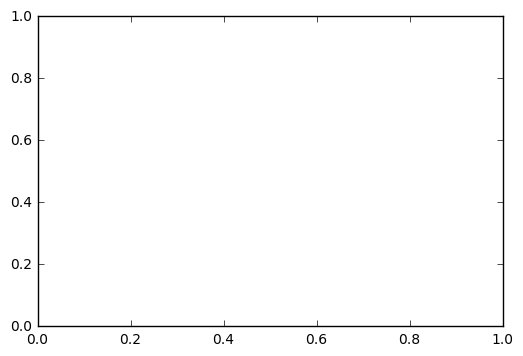

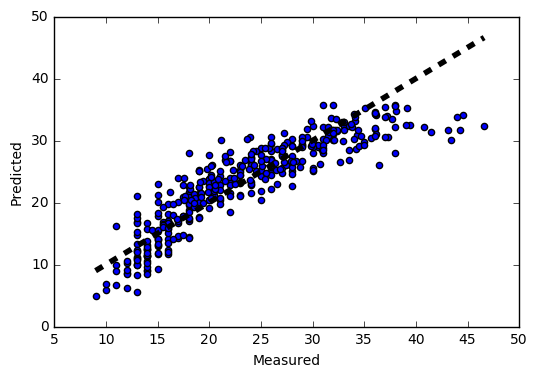

In [84]:
auto_df = auto_df[auto_df.horsepower != '?']
Y = np.array(auto_df.mpg)
X = np.array((auto_df[["weight", "horsepower", "cylinders", "displacement", "acceleration", "origin", "year"]]))

# Train the model using the training sets
lin_mod.fit(X, Y)

# The coefficients
print('Coefficients: \n', lin_mod.coef_)

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(lin_mod, X, Y, cv=10)
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [ ]:
import numpy np 
